In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding

In [176]:
titanic = pd.read_csv('./data/train.csv', encoding = 'UTF-8')

In [159]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [160]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
# Cabin은 널값이 많아서 제거
titanic = titanic.drop('Cabin', axis = 1)

In [14]:
# age 널 값은 Mrs, Mr, miss로 평균을 찾아서 대입
titanic.loc[titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [69]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [70]:
# 통계적 확인
titanic = titanic.drop('PassengerId', axis = 1)

In [87]:
titanic = titanic.reset_index()

([<matplotlib.axis.XTick at 0x2062550a288>,
 <a list of 18 Text xticklabel objects>)

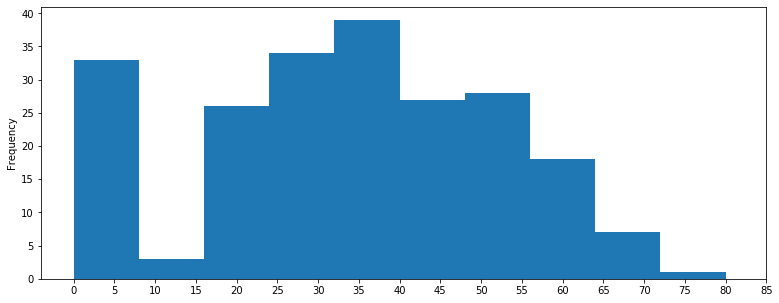

In [109]:
wow = titanic.pivot_table(values = 'Age' ,index = ['index'], columns = ['Pclass'], aggfunc = 'sum')
wow[1].plot(kind = 'hist', figsize = (13,5))
plt.xticks(np.arange(0,90,5))

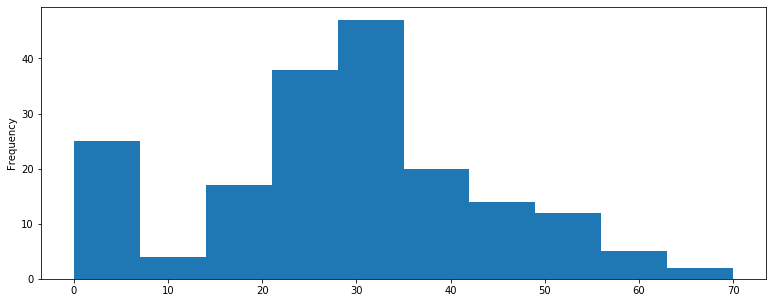

In [103]:
wow[2].plot(kind = 'hist', figsize = (13,5))

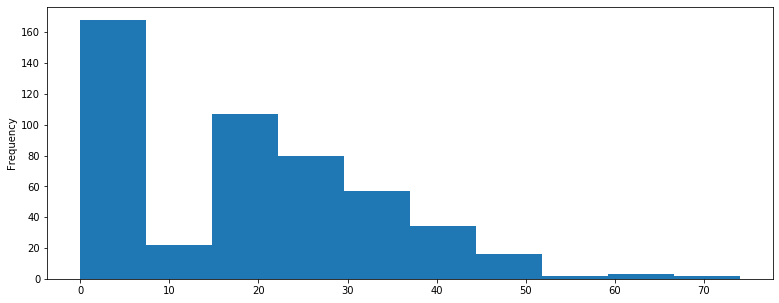

In [105]:
wow[3].plot(kind = 'hist', figsize = (13,5))

In [112]:
edit_tita = titanic.loc[:,['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Survived']]

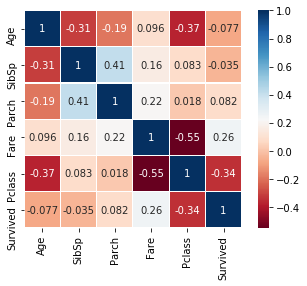

In [116]:
colormap = plt.cm.RdBu
sns.heatmap(edit_tita.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

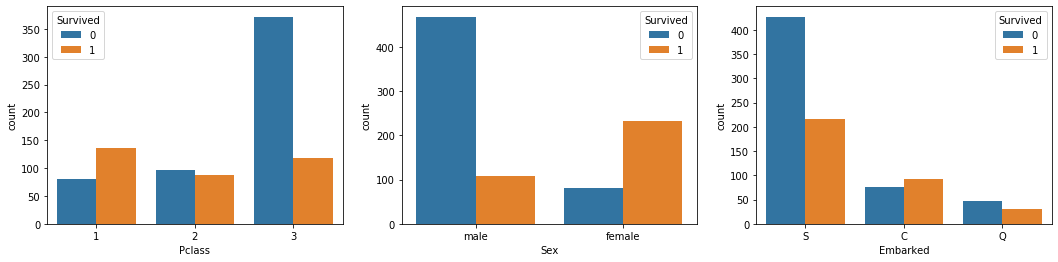

In [118]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 4)

sns.countplot(data=titanic, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=titanic, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=titanic, x='Embarked', hue='Survived', ax=ax3)

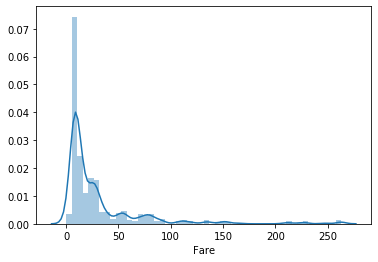

In [134]:
sns.distplot(titanic['Fare'], hist = True)

In [180]:
titanic.loc[titanic['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [181]:
titanic = titanic.drop([titanic.index[258],titanic.index[679],titanic.index[737]])

In [183]:
titanic = titanic.dropna(subset=['Embarked'])

In [185]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  886 non-null    int64  
 1   Survived     886 non-null    int64  
 2   Pclass       886 non-null    int64  
 3   Name         886 non-null    object 
 4   Sex          886 non-null    object 
 5   Age          709 non-null    float64
 6   SibSp        886 non-null    int64  
 7   Parch        886 non-null    int64  
 8   Ticket       886 non-null    object 
 9   Fare         886 non-null    float64
 10  Cabin        200 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.0+ KB


In [136]:
sexdic = {'male': 0, 'female': 1}

In [187]:
sex = titanic.Sex.apply(lambda x: sexdic[x])

In [140]:
embarkdic = {'S': 0, 'C': 1, 'Q':2 }

In [188]:
embarked = titanic.Embarked.apply(lambda x: embarkdic[x])

In [189]:
titanic = titanic.drop(['Sex','Embarked'], axis = 1)

In [190]:
titanic['Sex'] = sex
titanic['Embarked'] = embarked

In [191]:
titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1


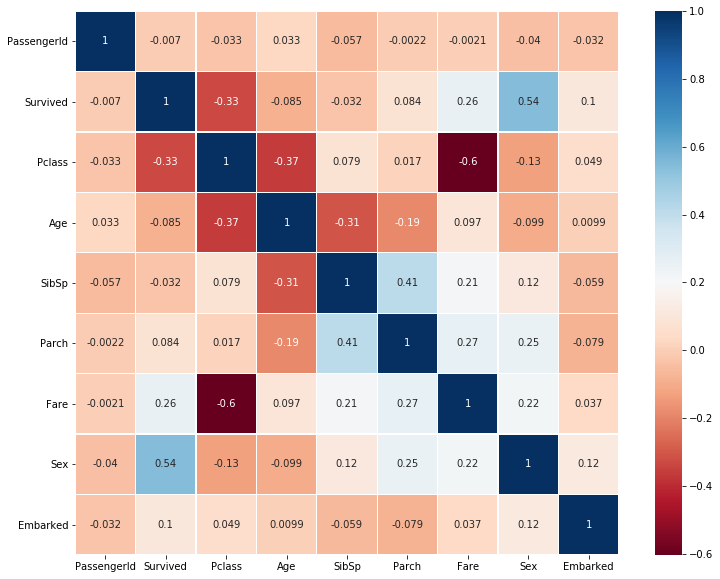

In [201]:
colormap = plt.cm.RdBu
plt.figure(figsize = (13,10))
sns.heatmap(titanic.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

In [221]:
titanic['Age_band'] = 0
titanic.loc[titanic['Age'] <= 16, 'Age_band'] = 'A'
titanic.loc[(titanic['Age'] >= 16) & (titanic['Age'] <=32), 'Age_band'] = 'B'
titanic.loc[(titanic['Age'] >= 32) & (titanic['Age'] <=48), 'Age_band'] = 'C'
titanic.loc[(titanic['Age'] <= 48) & (titanic['Age'] <=63), 'Age_band'] = 'D'
titanic.loc[titanic['Age'] > 63, 'Age_band'] = 'E'

In [231]:
titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,Embarked,Age_band,Age_A,Age_B,Age_C,Age_D,Age_E
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,D,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,D,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,D,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,D,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,D,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,0,D,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,D,0,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,D,0,0,0,1,0


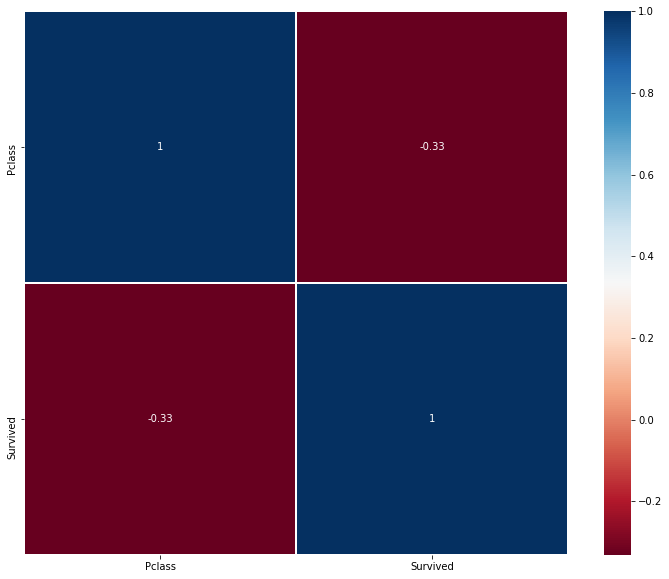

In [230]:
colormap = plt.cm.RdBu
new_tita = titanic.loc[:,['Pclass','Survived','Age_band']]
plt.figure(figsize = (13,10))
sns.heatmap(new_tita.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

In [224]:
titanic['Age_A'] = 0
titanic['Age_B'] = 0
titanic['Age_C'] = 0
titanic['Age_D'] = 0
titanic['Age_E'] = 0
titanic.loc[titanic['Age_band'] == 'A', 'Age_A'] = 1
titanic.loc[titanic['Age_band'] == 'B', 'Age_B'] = 1
titanic.loc[titanic['Age_band'] == 'C', 'Age_C'] = 1
titanic.loc[titanic['Age_band'] == 'D', 'Age_D'] = 1
titanic.loc[titanic['Age_band'] == 'E', 'Age_E'] = 1

In [232]:
import numpy as np
from sklearn.model_selection import train_test_split

X = titanic[['Pclass','Fare','Sex','Embarked','Age_A','Age_B','Age_C','Age_D','Age_E']]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [266]:
#그레디언트 부스트라는 앙상블 모델
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(random_state=0)
clf1.fit(X_train, y_train)
GradientBoostingClassifier(random_state=42)
y_pre = clf.predict(X_test)
clf.score(X_train,y_train)

0.8094435075885329

In [265]:
#그리드 서치로 파라미터값 찾기
score_list = []
for i in range(2,7,1):
    clf1 = GradientBoostingClassifier(learning_rate = 0.35,random_state = 42)
    clf1.fit(X_train, y_train)
    GradientBoostingClassifier(random_state=42)
    score_list.append(clf.score(X_test,y_test))